In [1]:
import pandas as pd
import sys
sys.path.append('/home/ifenty/git_repos_others/ECCO-GROUP/ECCOv4-py')
import ecco_v4_py as ecco
import matplotlib as mpl

import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from pathlib import Path

import matplotlib.pyplot as plt
import json
import time

from matplotlib.collections import PatchCollection
from matplotlib.patches import Rectangle
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

import warnings
warnings.filterwarnings('ignore')


In [2]:
ECCO_OHC_annual = xr.open_dataset('/home/ifenty/tmp/OHC/ECCO_V4r4_GLOBAL_OCEAN_HEAT_CONTENT_ANNUAL.nc')
ECCO_OHC_BY_LAT_annual = xr.open_dataset('/home/ifenty/tmp/OHC/ECCO_V4r4_GLOBAL_OCEAN_HEAT_CONTENT_ANNUAL_BY_10DEG_LAT.nc')

In [3]:
ECCO_OHC_monthly = xr.open_dataset('/home/ifenty/tmp/OHC/ECCO_V4r4_GLOBAL_OCEAN_HEAT_CONTENT_MONTHLY.nc')
ECCO_OHC_monthly.data_vars

Data variables:
    ECCO_OHC_ZJ                        (time) float32 ...
    ECCO_OHC_ANOM_WRT_CLIM_ZJ          (time) float32 ...
    ECCO_OHC_0_700m_ZJ                 (time) float32 ...
    ECCO_OHC_0_700m_ANOM_WRT_CLIM_ZJ   (time) float32 ...
    ECCO_OHC_0_2000m_ZJ                (time) float32 ...
    ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ  (time) float32 ...

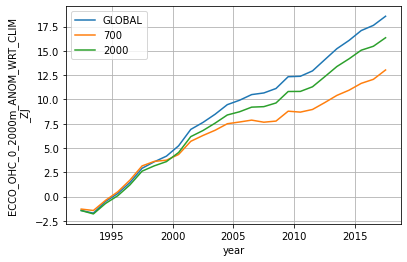

In [4]:
ECCO_OHC_annual.ECCO_OHC_ANOM_WRT_CLIM_ZJ.plot()
ECCO_OHC_annual.ECCO_OHC_0_700m_ANOM_WRT_CLIM_ZJ.plot()
ECCO_OHC_annual.ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ.plot()
plt.grid()
plt.legend(['GLOBAL','700','2000'])

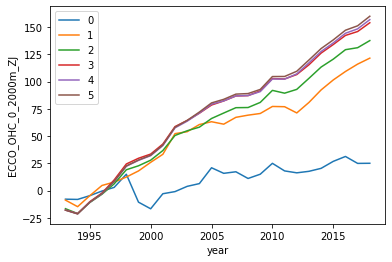

In [5]:
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(1)).sum(dim='lat_i').plot()
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(4)).sum(dim='lat_i').plot()
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(6)).sum(dim='lat_i').plot()
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(7)).sum(dim='lat_i').plot()
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(8)).sum(dim='lat_i').plot()
ECCO_OHC_BY_LAT_annual.ECCO_OHC_0_2000m_ZJ.isel(lat_i=range(9)).sum(dim='lat_i').plot()

plt.legend(range(6))

In [6]:
NOAA_data_path = Path('/home/ifenty/data/observations/OHC/NOAA')

In [7]:
noaa_2000m = xr.open_dataset(NOAA_data_path / 'heat_content_anomaly_0-2000_yearly.nc', decode_times=False)
noaa_700m = xr.open_dataset(NOAA_data_path / 'heat_content_anomaly_0-700_yearly.nc', decode_times=False)

In [8]:
noaa_2000m_pentad = xr.open_dataset(NOAA_data_path / 'heat_content_anomaly_0-2000_pentad.nc', decode_times=False)
noaa_700m_pentad = xr.open_dataset(NOAA_data_path / 'heat_content_anomaly_0-700_pentad.nc', decode_times=False)

In [9]:
noaa_ref_time = np.datetime64('1955-01')

In [10]:
noaa_700_times = []
for t in noaa_700m.yearl_h22_WO.time:
    #print(t.values)
    noaa_700_times.append(noaa_ref_time + np.timedelta64(int(t.values),'M'))
noaa_700_times = np.array(noaa_700_times)

In [11]:
noaa_2000_times = []
for t in noaa_2000m.yearl_h22_WO.time:
    #print(t.values)
    noaa_2000_times.append(noaa_ref_time + np.timedelta64(int(t.values),'M'))
noaa_2000_times = np.array(noaa_2000_times)

In [12]:
noaa_2000_pentad_times = []
for t in noaa_2000m_pentad.pent_h22_WO.time:
    #print(t.values)
    noaa_2000_pentad_times.append(noaa_ref_time + np.timedelta64(int(t.values),'M'))
noaa_2000_pentad_times = np.array(noaa_2000_pentad_times)
print(noaa_2000_pentad_times)

['1957-07' '1958-07' '1959-07' '1960-07' '1961-07' '1962-07' '1963-07'
 '1964-07' '1965-07' '1966-07' '1967-07' '1968-07' '1969-07' '1970-07'
 '1971-07' '1972-07' '1973-07' '1974-07' '1975-07' '1976-07' '1977-07'
 '1978-07' '1979-07' '1980-07' '1981-07' '1982-07' '1983-07' '1984-07'
 '1985-07' '1986-07' '1987-07' '1988-07' '1989-07' '1990-07' '1991-07'
 '1992-07' '1993-07' '1994-07' '1995-07' '1996-07' '1997-07' '1998-07'
 '1999-07' '2000-07' '2001-07' '2002-07' '2003-07' '2004-07' '2005-07'
 '2006-07' '2007-07' '2008-07' '2009-07' '2010-07' '2011-07' '2012-07'
 '2013-07' '2014-07' '2015-07' '2016-07' '2017-07' '2018-07']


In [13]:
noaa_700_pentad_times = []
for t in noaa_700m_pentad.pent_h22_WO.time:
    #print(t.values)
    noaa_700_pentad_times.append(noaa_ref_time + np.timedelta64(int(t.values),'M'))
noaa_700_pentad_times = np.array(noaa_700_pentad_times)
print(noaa_700_pentad_times)

['1957-07' '1958-07' '1959-07' '1960-07' '1961-07' '1962-07' '1963-07'
 '1964-07' '1965-07' '1966-07' '1967-07' '1968-07' '1969-07' '1970-07'
 '1971-07' '1972-07' '1973-07' '1974-07' '1975-07' '1976-07' '1977-07'
 '1978-07' '1979-07' '1980-07' '1981-07' '1982-07' '1983-07' '1984-07'
 '1985-07' '1986-07' '1987-07' '1988-07' '1989-07' '1990-07' '1991-07'
 '1992-07' '1993-07' '1994-07' '1995-07' '1996-07' '1997-07' '1998-07'
 '1999-07' '2000-07' '2001-07' '2002-07' '2003-07' '2004-07' '2005-07'
 '2006-07' '2007-07' '2008-07' '2009-07' '2010-07' '2011-07' '2012-07'
 '2013-07' '2014-07' '2015-07' '2016-07' '2017-07' '2018-07']


In [14]:
ecco_times_tmp = []
for year in ECCO_OHC_annual.year:
    print(year.values)
    tmp = int(year.values)
    #print(f'{tmp}-07')
    ecco_times_tmp.append(np.datetime64(f'{tmp}-07'))
ecco_times_tmp = np.array(ecco_times_tmp)
ecco_times_tmp

1992.5
1993.5
1994.5
1995.5
1996.5
1997.5
1998.5
1999.5
2000.5
2001.5
2002.5
2003.5
2004.5
2005.5
2006.5
2007.5
2008.5
2009.5
2010.5
2011.5
2012.5
2013.5
2014.5
2015.5
2016.5
2017.5


array(['1992-07', '1993-07', '1994-07', '1995-07', '1996-07', '1997-07',
       '1998-07', '1999-07', '2000-07', '2001-07', '2002-07', '2003-07',
       '2004-07', '2005-07', '2006-07', '2007-07', '2008-07', '2009-07',
       '2010-07', '2011-07', '2012-07', '2013-07', '2014-07', '2015-07',
       '2016-07', '2017-07'], dtype='datetime64[M]')

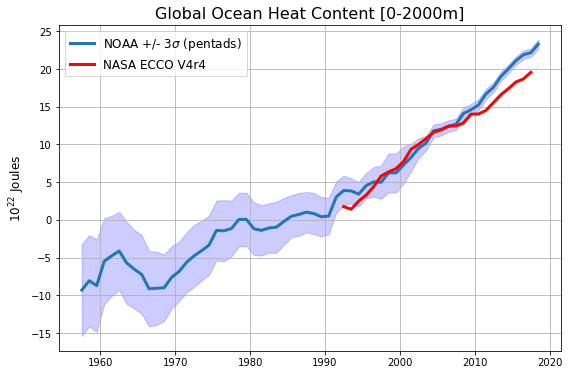

In [15]:
tmp_pentad =  noaa_2000m_pentad['pent_h22_WO']
tmp_pentad_se = noaa_2000m_pentad['pent_h22_se_WO']

plt.figure(figsize=[9,6])

plt.plot(noaa_2000_pentad_times, tmp_pentad, '-', linewidth=3)

plt.fill_between(noaa_2000_pentad_times, tmp_pentad+3*tmp_pentad_se, tmp_pentad-3*tmp_pentad_se,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)

#plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ*1.35 + .5,'r-', linewidth=3)
plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ + 3.20,'r-', linewidth=3)

plt.grid()
plt.legend(['NOAA +/- 3$\sigma$ (pentads)','NASA ECCO V4r4'],fontsize=12,loc = 'upper left')
plt.title('Global Ocean Heat Content [0-2000m]', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_2000m_1960-2020_PENTADS.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_2000m_1960-2020_PENTADS.jpg',dpi=150)

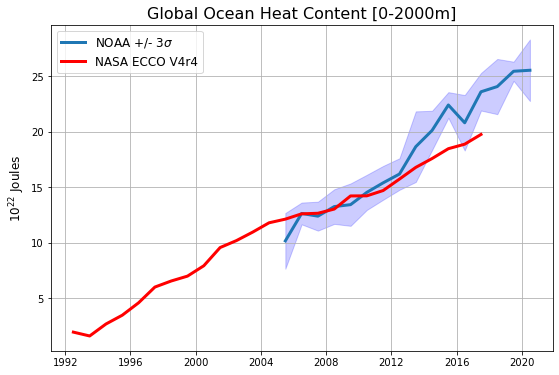

In [16]:
tmp =  noaa_2000m['yearl_h22_WO']
tmp_se = noaa_2000m['yearl_h22_se_WO']
plt.figure(figsize=[9,6])
plt.plot(noaa_2000_times, tmp, linewidth=3)

plt.fill_between(noaa_2000_times, tmp+3*tmp_se, tmp-3*tmp_se,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)


plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ+3.4, 'r-', linewidth=3)
                 
plt.grid()
plt.legend(['NOAA +/- 3$\sigma$','NASA ECCO V4r4'],fontsize=12,loc = 'upper left')
plt.title('Global Ocean Heat Content [0-2000m]', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_2000m_1960-2020.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_2000m_1960-2020.jpg',dpi=150)

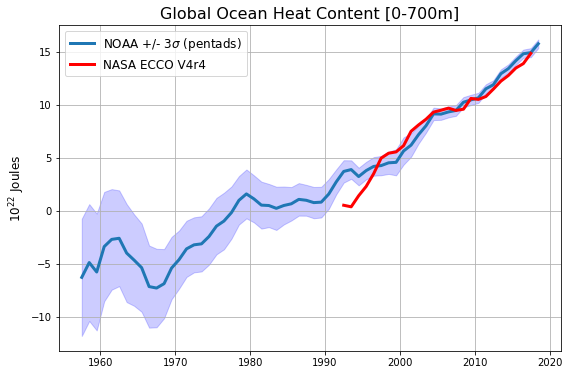

In [17]:
tmp =  noaa_700m_pentad['pent_h22_WO']
tmp_se = noaa_700m_pentad['pent_h22_se_WO']
plt.figure(figsize=[9,6])

plt.plot(noaa_700_pentad_times, tmp, '-', linewidth=3)

plt.fill_between(noaa_700_pentad_times, tmp+3*tmp_se, tmp-3*tmp_se,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill


plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_0_700m_ANOM_WRT_CLIM_ZJ+1.8,'r-', linewidth=3)
plt.grid()
plt.legend(['NOAA +/- 3$\sigma$ (pentads)','NASA ECCO V4r4'],fontsize=12,loc = 'upper left')
plt.title('Global Ocean Heat Content [0-700m]', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_700m_1960-2020_PENTADS.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_700m_1960-2020_PENTADS.jpg',dpi=150)

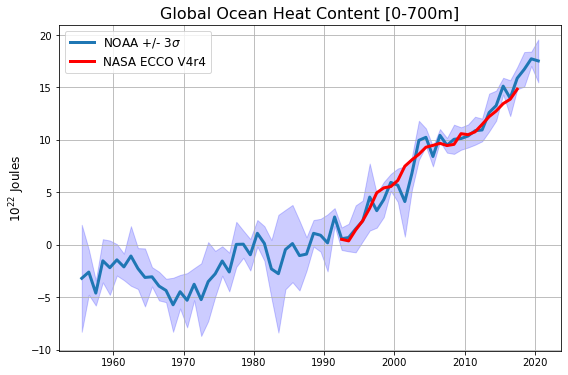

In [18]:
tmp =  noaa_700m['yearl_h22_WO']
tmp_se = noaa_700m['yearl_h22_se_WO']
plt.figure(figsize=[9,6])

plt.plot(noaa_700_times, tmp, '-', linewidth=3)

plt.fill_between(noaa_700_times, tmp+3*tmp_se, tmp-3*tmp_se,
                 facecolor="blue", # The fill color
                 color='blue',       # The outline color
                 alpha=0.2)          # Transparency of the fill


plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_0_700m_ANOM_WRT_CLIM_ZJ+1.8,'r-', linewidth=3)
plt.grid()
plt.legend(['NOAA +/- 3$\sigma$','NASA ECCO V4r4'],fontsize=12,loc = 'upper left')
plt.title('Global Ocean Heat Content [0-700m]', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_700m_1960-2020.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_NOAA_VS_ECCO_700m_1960-2020.jpg',dpi=150)

In [19]:
ECCO_OHC_monthly.data_vars

Data variables:
    ECCO_OHC_ZJ                        (time) float32 ...
    ECCO_OHC_ANOM_WRT_CLIM_ZJ          (time) float32 ...
    ECCO_OHC_0_700m_ZJ                 (time) float32 ...
    ECCO_OHC_0_700m_ANOM_WRT_CLIM_ZJ   (time) float32 ...
    ECCO_OHC_0_2000m_ZJ                (time) float32 ...
    ECCO_OHC_0_2000m_ANOM_WRT_CLIM_ZJ  (time) float32 ...

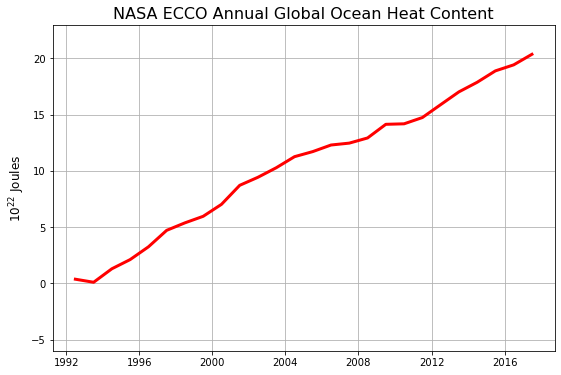

In [48]:
plt.figure(figsize=[9,6])
plt.plot(ecco_times_tmp,ECCO_OHC_annual.ECCO_OHC_ANOM_WRT_CLIM_ZJ+1.8,'r-', linewidth=3)
plt.grid()
plt.title('NASA ECCO Annual Global Ocean Heat Content', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)

ax = plt.gca();
ax.set_ylim([-6, 23])
ax.xaxis.grid(True, which='minor')
xlim = plt.xlim()

plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_ANNUAL_FULL_DEPTH_1992-2018.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_ANNUAL_FULL_DEPTH_1992-2018.jpg',dpi=150)

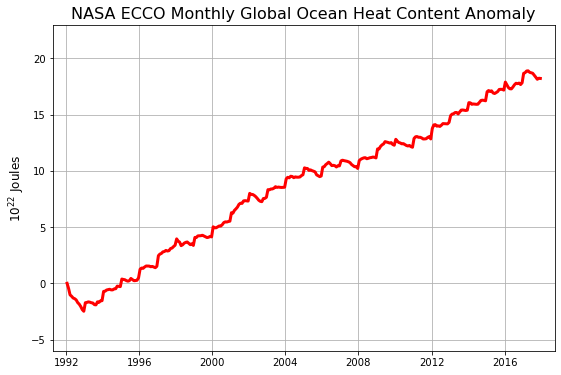

In [49]:
plt.figure(figsize=[9,6])
plt.plot(ECCO_OHC_monthly.time,ECCO_OHC_monthly.ECCO_OHC_ANOM_WRT_CLIM_ZJ,'r-', linewidth=3)
plt.grid()
plt.title('NASA ECCO Monthly Global Ocean Heat Content Anomaly', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)

ax = plt.gca();
ax.set_ylim([-6, 23])
ax.set_xlim(xlim)
ax.xaxis.grid(True, which='minor')

plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_MONTHLY_ANOMALY_FULL_DEPTH_1992-2018.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_MONTHLY_ANOMALY_FULL_DEPTH_1992-2018.jpg',dpi=150)


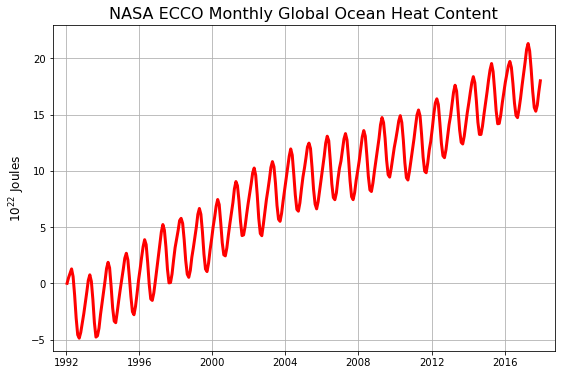

In [50]:
plt.figure(figsize=[9,6])
plt.plot(ECCO_OHC_monthly.time,ECCO_OHC_monthly.ECCO_OHC_ZJ,'r-', linewidth=3)
plt.grid()
plt.title('NASA ECCO Monthly Global Ocean Heat Content', fontsize=16)
plt.ylabel('$10^{22}$ Joules',fontsize=12)

ax = plt.gca();
ax.set_ylim([-6, 23])
ax.set_xlim(xlim)
ax.xaxis.grid(True, which='minor')

plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_MONTHLY_FULL_DEPTH_1992-2018.png',dpi=150)
plt.savefig('/home/ifenty/tmp/OHC/OHC_ECCO_MONTHLY_FULL_DEPTH_1992-2018.jpg',dpi=150)